Abgabe 2 Mark Nagengast Porro, Tim Schwabe

Aufgabe 1

In [272]:
import networkx as nx
import numpy as np
import matplotlib as plt

np.random.seed(10)

In [273]:
alpha = 0.1
pop_size = 20

In [274]:
def createGraph(n_nodes, n_edges):
    G = nx.Graph()
    G.add_nodes_from([i for i in range(0,n_nodes)])

    for n in range(n_edges):
        a = np.random.randint(n_nodes)
        while True:
            b = np.random.randint(n_nodes)
            if a != b:
                break
        G.add_edge(a,b)
    
    return G


G = createGraph(10,20)


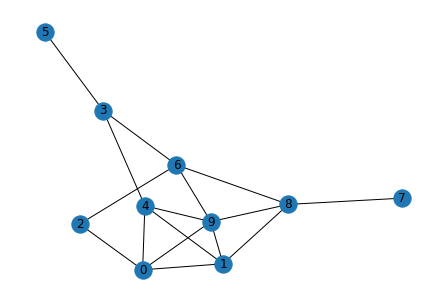

In [275]:
nx.draw(G, with_labels = True)

Aufgabe 2

In [276]:
def init_population(G):
    dic = dict()
    for i in range(0, pop_size):
        a = np.random.randint(G.number_of_nodes())
        while True:
            b = np.random.randint(G.number_of_nodes())
            if a != b:
                break
        dic.update([((a,b),0)])
    return dic

In [277]:
def fitness(population, G):
    fitness = 0

    for key in population:
        fitness = 0
        for i in range(len(key)-1):
            for j in range(1,len(key)):
                if G.has_edge(key[i], key[j]):
                    fitness += 1
                else: 
                    fitness -= alpha*len(key)
        population.update([(key, fitness)])

Aufgabe 3

In [278]:
max( len(c) for c in nx.find_cliques(G))

4

In [279]:
population = init_population(G)
#print(population)
fitness(population,G)
population

{(6, 9): 1,
 (1, 8): 1,
 (9, 1): 1,
 (2, 8): -0.2,
 (9, 5): -0.2,
 (0, 2): 1,
 (7, 3): -0.2,
 (0, 4): 1,
 (2, 0): 1,
 (3, 1): -0.2,
 (2, 5): -0.2,
 (9, 0): 1,
 (1, 0): 1,
 (1, 9): 1,
 (0, 9): 1,
 (2, 1): -0.2,
 (0, 5): -0.2,
 (4, 6): -0.2}

In [280]:
# Selektion
import operator
population = dict(sorted(population.items(),key=operator.itemgetter(1),reverse=True)[:10])
population

{(6, 9): 1,
 (1, 8): 1,
 (9, 1): 1,
 (0, 2): 1,
 (0, 4): 1,
 (2, 0): 1,
 (9, 0): 1,
 (1, 0): 1,
 (1, 9): 1,
 (0, 9): 1}

In [281]:
# Rekombination

def recombination(pop):
    new_pop = dict()
    for i in range(len(pop)-1):
        for j in range(i,len(pop)):
            appended = tuple(set(list(pop)[i] + list(pop)[j]))
            appended = tuple(set(appended))
            while len(appended) > max(len(list(pop)[i]), len(list(pop)[j])):            
                random_idx = np.random.choice(len(appended))
                appended = list(appended)
                del appended[random_idx]
                new_pop.update([(tuple(appended), 0)])
    return new_pop
population = recombination(population)
population
print(len(population))



31
